In [36]:
import pandas as pd
import os
import openpyxl
import re
import seaborn as sns
import matplotlib.pyplot as plt

csv_file = "../project_1/data/attacks.csv"
sharks = pd.read_csv(csv_file, encoding="ISO-8859-1")
sharks


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:

# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

# Configuration to set so that all the Seaborn figs come out with this size
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [38]:
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [39]:
sharks.columns
sharks.dtypes
sharks.isna().sum()


Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

### QUESTIONS AND INFO NEDED

In [40]:
"""
1. In which country are there more shark attacks? Wich are the countries from South Africa with higher number 
of attacks?

2. Wich are the months with more attacks in the country? 

3. For each region with more attacks wich is the activity with higher number of attacks? 
Wich months you should avoid this activities in this certain areas?

-----

NEEDS: 
    1. Cleaning the columns date and year, maybe making only one that shows the exact date or on for month and one 
    for year? 
        TWO COLUMS YEAR AND DATE:
            1.1 YEAR: Almost clean. Change de empty values and zeros for Nan, don't take those years into account.
            1.2 DATE: Keep only the day and month, no need of the year, already have it.
    2. Cleaning the columns country, area maybe focusing on a certain country with a lot of shark attacks and see wich places to avoid. 
        TWO COLUMNS COUNTRY AND AREA:
            2.1 COUNTRY: Almost clean. Unify data (countries), change empty values for Nan. 
            2.2 AREA: Dirty, empty values for Nan, unify names, get rid of numbers, digits, FALSO for Nan
    3. Cleaning activities are the most common for age and gender when a shark attack ocurrs.
        TWO ACTIVITY:
            3.2 ACTIVITY: VERY VERY VERY DIRTY, Create general labels (surfing, padel, boat, cage, swiming).
"""

"\n1. In which country are there more shark attacks? Wich are the countries from South Africa with higher number \nof attacks?\n\n2. Wich are the months with more attacks in the country? \n\n3. For each region with more attacks wich is the activity with higher number of attacks? \nWich months you should avoid this activities in this certain areas?\n\n-----\n\nNEEDS: \n    1. Cleaning the columns date and year, maybe making only one that shows the exact date or on for month and one \n    for year? \n        TWO COLUMS YEAR AND DATE:\n            1.1 YEAR: Almost clean. Change de empty values and zeros for Nan, don't take those years into account.\n            1.2 DATE: Keep only the day and month, no need of the year, already have it.\n    2. Cleaning the columns country, area maybe focusing on a certain country with a lot of shark attacks and see wich places to avoid. \n        TWO COLUMNS COUNTRY AND AREA:\n            2.1 COUNTRY: Almost clean. Unify data (countries), change empty va

# CLEANING


### INDEX

In [41]:
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [42]:
#Drop the duplicated raws

sharks.drop_duplicates(subset=list(sharks.columns))

# From raw 6301 until the end the datase has empty values, so we are going to drop this raws in order to have it clean

sharks = sharks.drop(sharks.index[6302:])
sharks.sample()

# We also can see that the columns Unnamed: 22 and Unnamed: 23 are empty so we are going to drop them also

sharks = sharks.drop(["Unnamed: 23"], axis=1)

sharks = sharks.drop(["Unnamed: 22"], axis=1)

### YEAR COLUMN

In [43]:
# Replacing the 0 at the end of many years

sharks['Year'] = sharks['Year'].astype(str).replace(to_replace=r'\.0', value='', regex=True)

### MONTH COLUMN

In [44]:
# Targeting the month column in order to get the maximum clean data

sharks.sample(10)

# Hata linea 6177 case number = Date --> Lo pongo en numerico mas facil de usar

sharks.loc[0:6301, 'Date'] = sharks.loc[0:6301, 'Case Number.1']  

# Quito caracteres posteriores (a, b, c...)

sharks['Date'] = sharks['Date'].str.extract('^(\d{4}\.\d{2}\.\d{2})', expand=False)

#substituyo resto de valores a partir de raw 6177 ya que no sabemos el mes de documentacion, por unknown

sharks.loc[6177:, 'Date'] = 'UNKNOWN'

#Creating a new columns (MONTH) for each month

sharks['Month'] = sharks['Date'].str.split('.').str[1]

# Changing the values for months in the column Month

month_mapping = {
    '01': 'Jan',
    '02': 'Feb',
    '03': 'Mar',
    '04': 'Apr',
    '05': 'May',
    '06': 'June',
    '07': 'July',
    '08': 'Aug',
    '09': 'Sept',
    '10': 'Oct',
    '11': 'Nov',
    '12': 'Dec'
}

sharks['Month'] = sharks['Month'].replace(month_mapping)


sharks

#MONTH AND YEAR CLEAN

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Month
0,2018.06.25,2018.06.25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,June
1,2018.06.18,2018.06.18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,June
2,2018.06.09,2018.06.09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,June
3,2018.06.08,2018.06.08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,June
4,2018.06.04,2018.06.04,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,UNKNOWN,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN
6298,ND.0004,UNKNOWN,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN
6299,ND.0003,UNKNOWN,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN
6300,ND.0002,UNKNOWN,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN


### ACTIVITIES


In [45]:
# Filling missing values(Nan) --> Unknown

sharks.Activity.fillna("UNKNOWN", inplace=True)
sharks.Activity.isna().sum()

0

In [46]:
# Searching all the activities and standirizing them

activies_patterns = {
    'SWIMMING' : r'.*(swim|bath|float).*',
    'SURFING' : r'.*surf.*',
    'SPEARFISHING' : r'.*spearfishing.*',
    'FISHING': r'.*fish.*',
    'BOATING' : r'.*boat.*',
    'WADING' : r'.*(wad|walk).*',
    'DIVING' : r'.*div.*',
    'FALL' : r'.(fall|fell).*',
    'STANDING' : r'.*stand.*',
    'SHARK INTERACTION': r'.*shark.*',
    'SNORKELING': r'.*snorkel.*',
    'OTHER WATER SPORTS' : r'.*(board|pad|ski|sup|kayak).*',
    'OTHER' : r'.*(unknown|" ").*',
}

In [47]:
def clean_activities(activity):
    for category, pattern in activies_patterns.items():
        if re.search(pattern, activity, re.IGNORECASE):
            return category
    return "OTHER"

In [48]:
sharks["activities_clean"] = sharks["Activity"].apply(clean_activities)

In [49]:
# Making all the activities upper (not case sensitive)

sharks.Activity = sharks.Activity.str.upper()


In [50]:
sharks.Activity.value_counts()

Activity
SURFING                                         971
SWIMMING                                        869
UNKNOWN                                         547
FISHING                                         431
SPEARFISHING                                    333
                                               ... 
SINKING OF THE M/V MINDORO DURING A TYPHOON       1
SWIMMING AFTER HIS CANOE CAPSIZED                 1
PICKING UP SHARK BY THE TAIL                      1
WADING & PUSHING DINGHY TOWARD  THE SHALLOWS      1
WRECK OF  LARGE DOUBLE SAILING CANOE              1
Name: count, Length: 1504, dtype: int64

# GRAPHS



In [51]:
# 1. WHERE IS SOUTH AFRICA RANKED AMONGST WORLD?
# 2. WICH ARE THE MOST DANGEROUS REGIONS?

Country
USA                 2229
AUSTRALIA           1338
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
BRAZIL               112
BAHAMAS              109
MEXICO                89
ITALY                 71
Name: count, dtype: int64

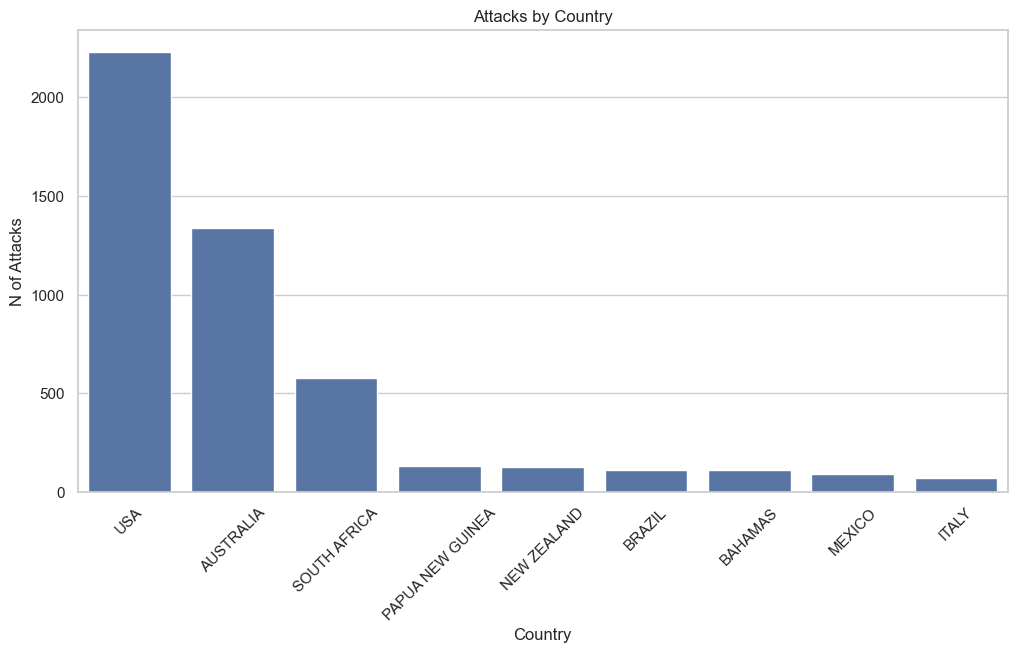

In [52]:
#2 Number of attacks in South Africa vs World --> position
    # Inside South Africa --> Regions with higher attacks

country_counts = sharks["Country"].value_counts().sort_index(ascending=True)
filtered_countries = country_counts[country_counts>=70].index

attacks_location_reduced = sharks[sharks["Country"].isin(filtered_countries)].sort_index(ascending=True)
attacks_location_reduced.value_counts("Country")

sns.countplot(x='Country', data=attacks_location_reduced, order=attacks_location_reduced['Country'].value_counts().index)
plt.xlabel('Country')
plt.ylabel('N of Attacks')
plt.title('Attacks by Country')
plt.xticks(rotation=45)

attacks_location_reduced.Country.value_counts()



In [53]:
#New DF with South Africa region

south_africa_sharks = sharks[sharks.Country == "SOUTH AFRICA"]

Text(0, 0.5, 'Attacks')

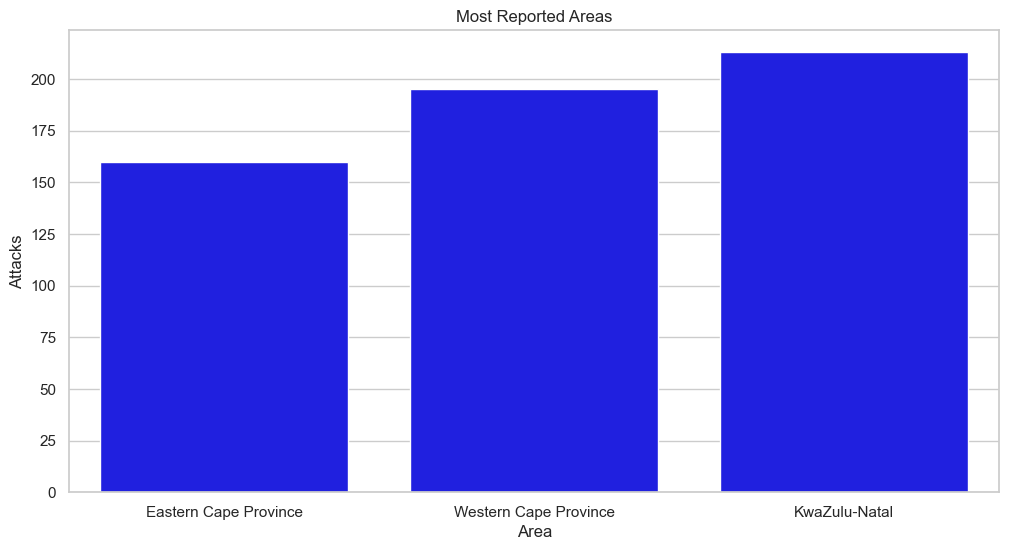

In [54]:
#AREA SOUTH AFRICA

country_counts_SA = south_africa_sharks["Area"].value_counts()

filtered_areas = country_counts_SA[country_counts_SA>=3].index
attacks_area_reduced_SA = south_africa_sharks[south_africa_sharks["Area"].isin(filtered_areas)]


sns.countplot(x=attacks_area_reduced_SA.Area, color="blue");
plt.title('Most Reported Areas')
plt.xlabel('Area')
plt.ylabel('Attacks')



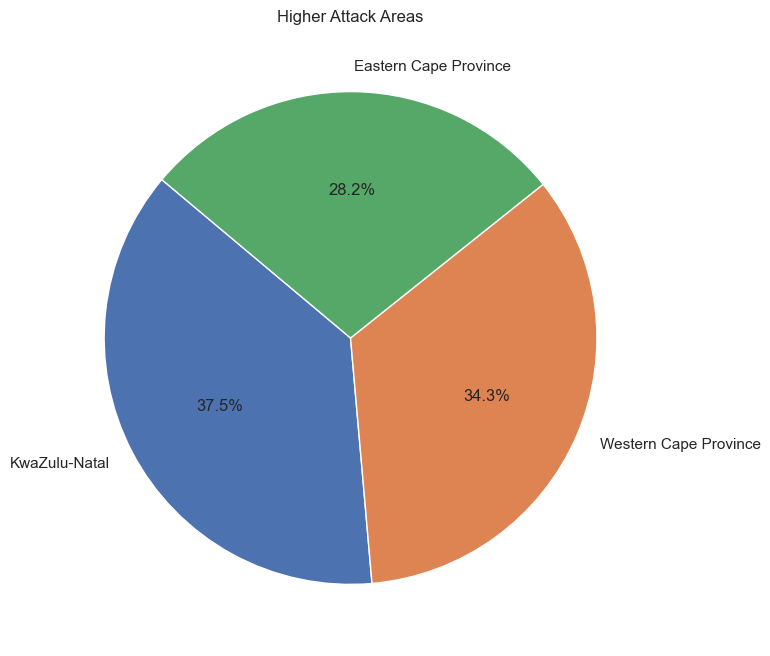

In [55]:

# counting the attacks of every area
area_counts = attacks_area_reduced_SA['Area'].value_counts()

# Filtering the areas with more than 3 attacks
filtered_areas = area_counts[area_counts >= 3]

# Crating a Plot
plt.figure(figsize=(8, 8))
plt.pie(filtered_areas, labels=filtered_areas.index, autopct='%1.1f%%', startangle=140)
plt.title('Higher Attack Areas')

# Showing plot
plt.show()




In [56]:
filtered_areas.value_counts()

count
213    1
195    1
160    1
Name: count, dtype: int64

In [57]:
# Number of attacks per month (date) in South Africa

south_africa_sharks.groupby("Month")
south_africa_sharks.Month.value_counts()


Month
Jan     106
Dec      68
Feb      56
Mar      52
Apr      48
May      38
July     37
Nov      35
Oct      30
June     27
00       27
Aug      25
Sept     22
Name: count, dtype: int64

Text(0.5, 1.0, 'Attacks by Month')

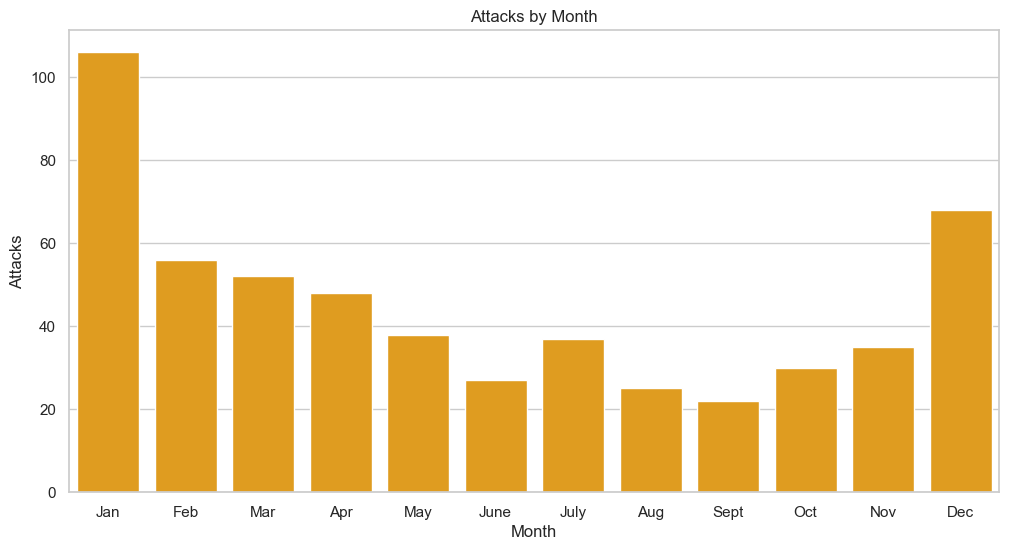

In [58]:
# In South Africa wich are the most dangerous months

month_order_1 = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov', 'Dec']


sns.countplot(x='Month', data=south_africa_sharks, order=month_order_1, color="orange")
plt.xlabel('Month')
plt.ylabel('Attacks')
plt.title('Attacks by Month')




In [59]:
south_africa_sharks.Month.value_counts()

Month
Jan     106
Dec      68
Feb      56
Mar      52
Apr      48
May      38
July     37
Nov      35
Oct      30
June     27
00       27
Aug      25
Sept     22
Name: count, dtype: int64

<Axes: xlabel='Month', ylabel='Count'>

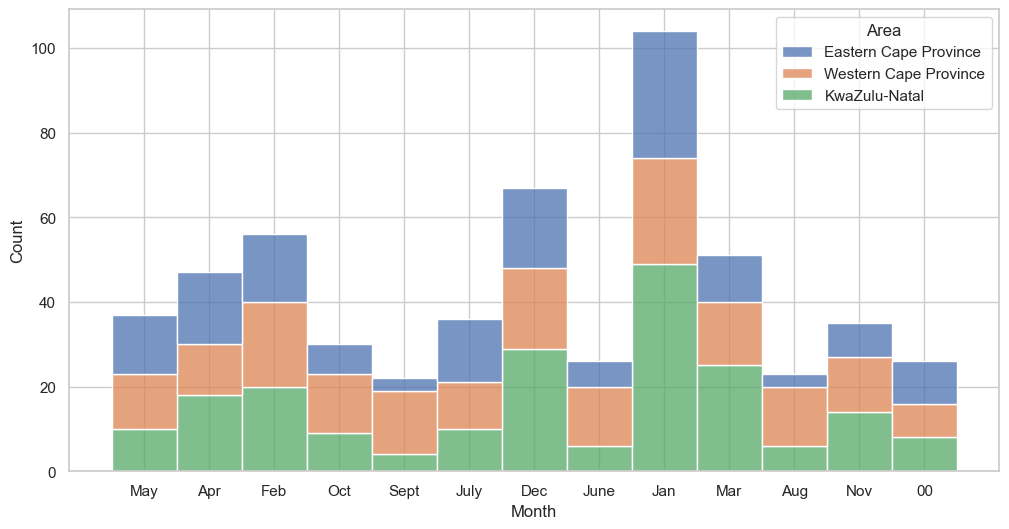

In [60]:
#3.1 From the 3 most dangerous regions which are the most dangerous activities?



eastern_cape_province = south_africa_sharks[south_africa_sharks.Area == "Eastern Cape Province"]
                            
western_cape_province = south_africa_sharks[south_africa_sharks.Area == "Western Cape Province"]

kwazulu = south_africa_sharks[south_africa_sharks.Area == "KwaZulu-Natal"]

sns.histplot(data=attacks_area_reduced_SA, x="Month", hue="Area", multiple="stack")



([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'SURFING'),
  Text(1, 0, 'FISHING'),
  Text(2, 0, 'SWIMMING'),
  Text(3, 0, 'BODY BOARDING'),
  Text(4, 0, 'UNKNOWN'),
  Text(5, 0, 'BODY SURFING')])

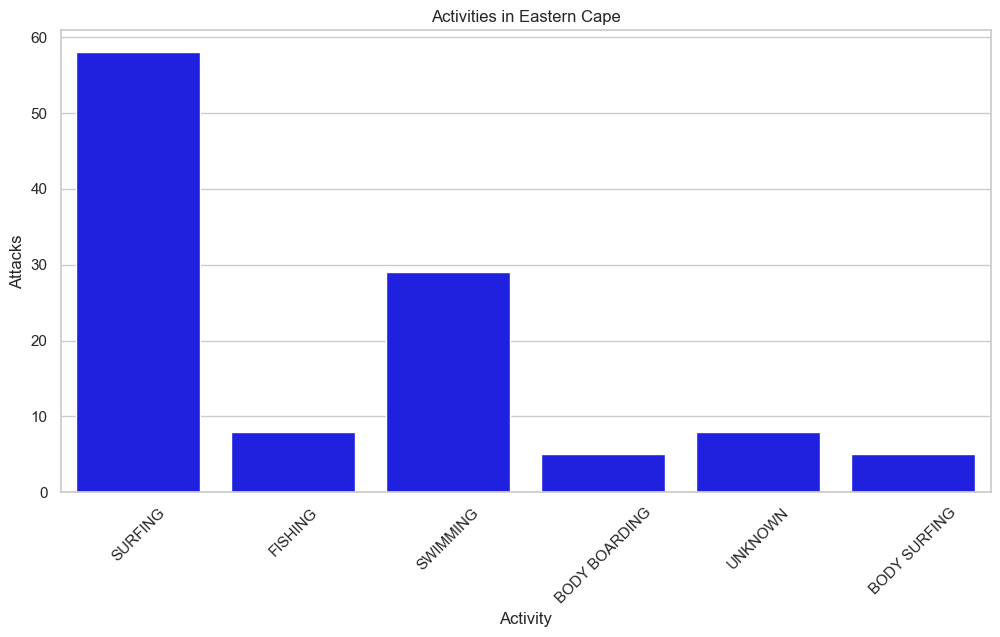

In [61]:
#EASTERN CAPE PROVINCE DANGEROUS ACTIVITIES and wich months should you avoid doing it.


activity_count = eastern_cape_province["Activity"].value_counts()
filtered_activities = activity_count[activity_count > 4].index
activities_reduced_cp = eastern_cape_province[eastern_cape_province["Activity"].isin(filtered_activities)]


sns.countplot(x=activities_reduced_cp["Activity"], color="blue");
plt.xlabel('Activity')
plt.ylabel('Attacks')
plt.title('Activities in Eastern Cape')
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Surfing in Eastern Cape')

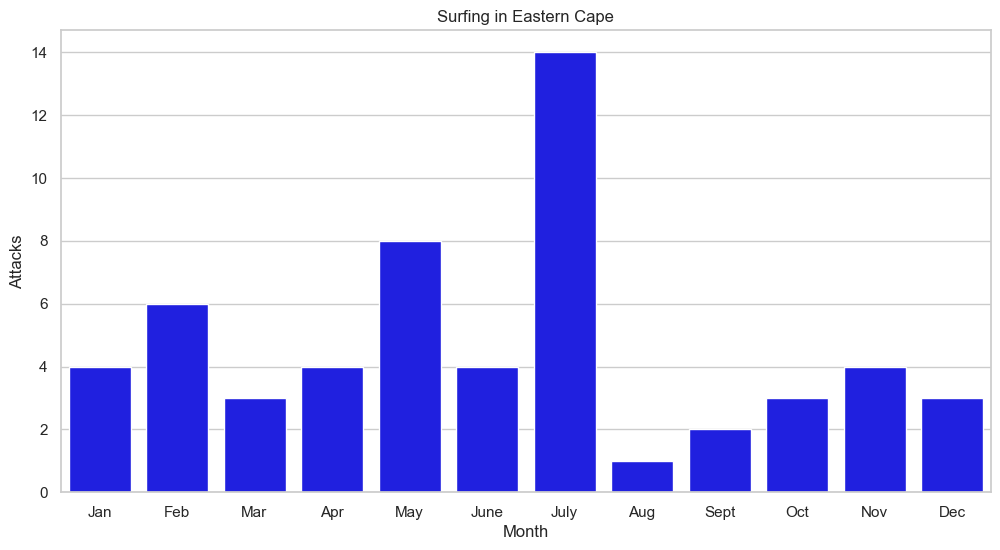

In [63]:

#EASTERN CAPE PROVINCE DANGEROUS ACTIVITIES --> SURFING


surf_cp = eastern_cape_province[eastern_cape_province.Activity == "SURFING"]


surf_cp
sns.countplot(x=surf_cp.Month, order=month_order_1, color= "blue");
plt.xlabel('Month')
plt.ylabel('Attacks')
plt.title('Surfing in Eastern Cape')



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'SCUBA DIVING'),
  Text(1, 0, 'SURFING'),
  Text(2, 0, 'SPEARFISHING'),
  Text(3, 0, 'SURF-SKIING'),
  Text(4, 0, 'BODY BOARDING'),
  Text(5, 0, 'FREE DIVING'),
  Text(6, 0, 'FISHING'),
  Text(7, 0, 'SWIMMING'),
  Text(8, 0, 'UNKNOWN'),
  Text(9, 0, 'FISHING FOR KOB')])

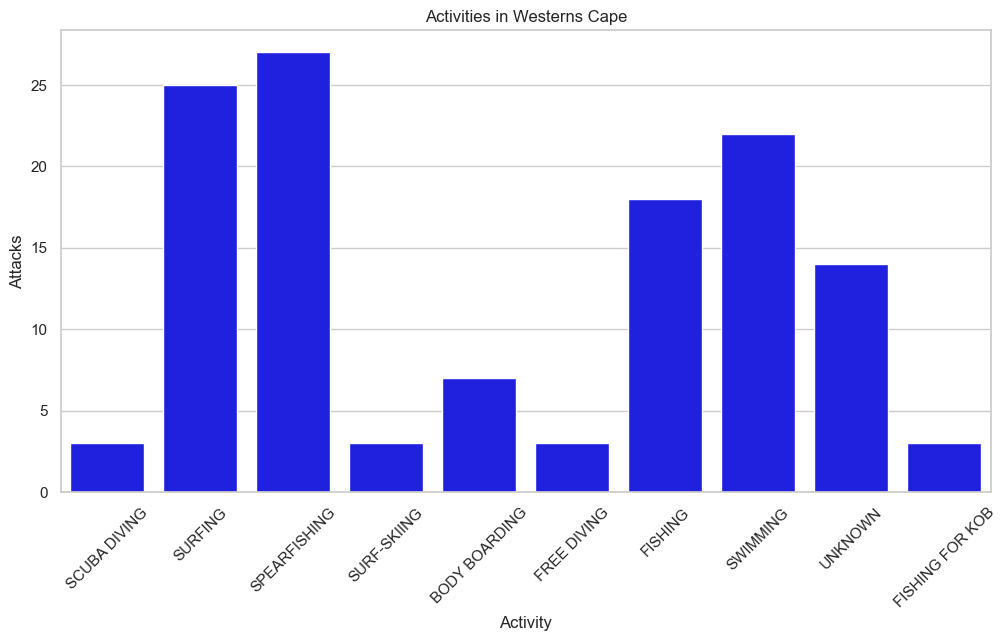

In [65]:
# Western Cape Province Dangerous Activity and wich month should you avoid doing it

activity_count = western_cape_province["Activity"].value_counts()
filtered_activities = activity_count[activity_count >= 3].index
activities_reduced_wc = western_cape_province[western_cape_province["Activity"].isin(filtered_activities)]


sns.countplot(x=activities_reduced_wc["Activity"], color="blue");
plt.ylabel('Attacks')
plt.title('Activities in Westerns Cape')

plt.xticks(rotation=45)


Month
Dec     4
Sept    4
Aug     3
Feb     3
Apr     2
Jan     2
June    2
May     2
Oct     2
00      1
July    1
Nov     1
Name: count, dtype: int64

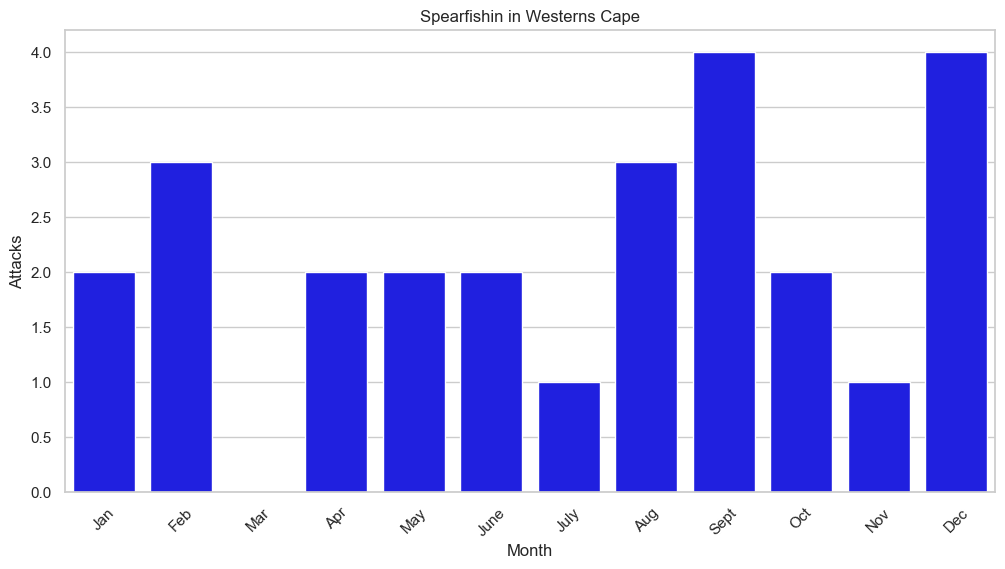

In [68]:
#WESTERN CAPE PROVINCE DANGEROUS ACTIVITIES --> SPEARFISHING

fish_wc = western_cape_province[western_cape_province.Activity == "SPEARFISHING"]
fish_wc
sns.countplot(x=fish_wc.Month, order=month_order_1, color = "blue");
plt.xlabel('Month')
plt.ylabel('Attacks')
plt.title('Spearfishin in Westerns Cape')

plt.xticks(rotation=45)

fish_wc.value_counts("Month")

Activity
SWIMMING          34
UNKNOWN           22
SPEARFISHING      18
TREADING WATER    17
SURFING           13
FISHING           10
SCUBA DIVING       7
SWIMMING           7
STANDING           7
BODY SURFING       7
Name: count, dtype: int64

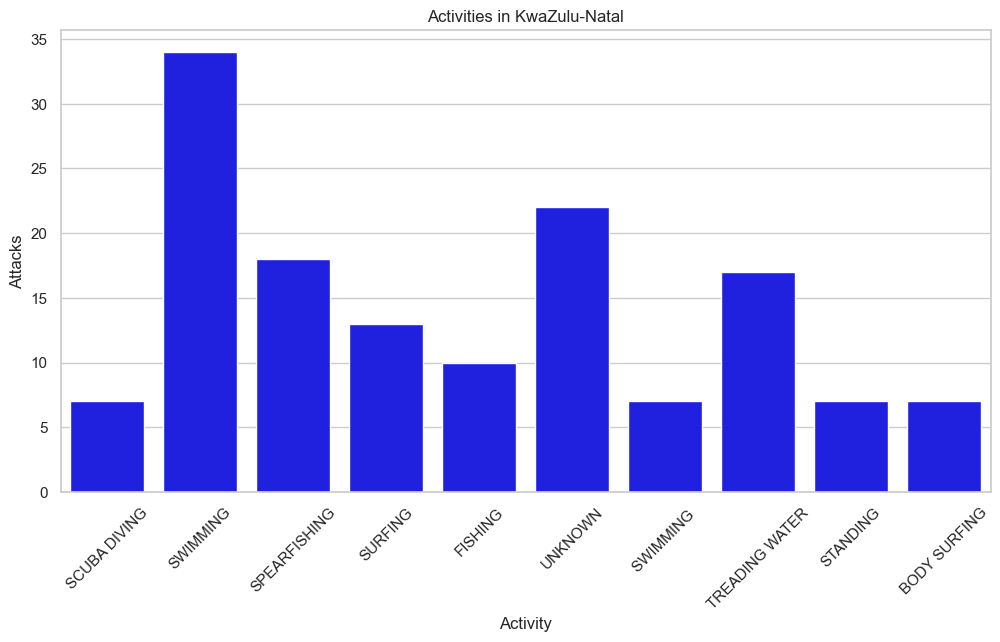

In [69]:
# KwaZulu-Natal Dangerous Activity

activity_count = kwazulu["Activity"].value_counts()
filtered_activities = activity_count[activity_count > 5].index
activities_reduced_kw = kwazulu[kwazulu["Activity"].isin(filtered_activities)]


sns.countplot(x=activities_reduced_kw["Activity"], color="blue");
plt.ylabel('Attacks')
plt.title('Activities in KwaZulu-Natal')
plt.xticks(rotation=45)

activities_reduced_kw.Activity.value_counts()

Month
Jan     9
Feb     5
Nov     5
Apr     4
Dec     4
Mar     2
00      1
July    1
June    1
Oct     1
Sept    1
Name: count, dtype: int64

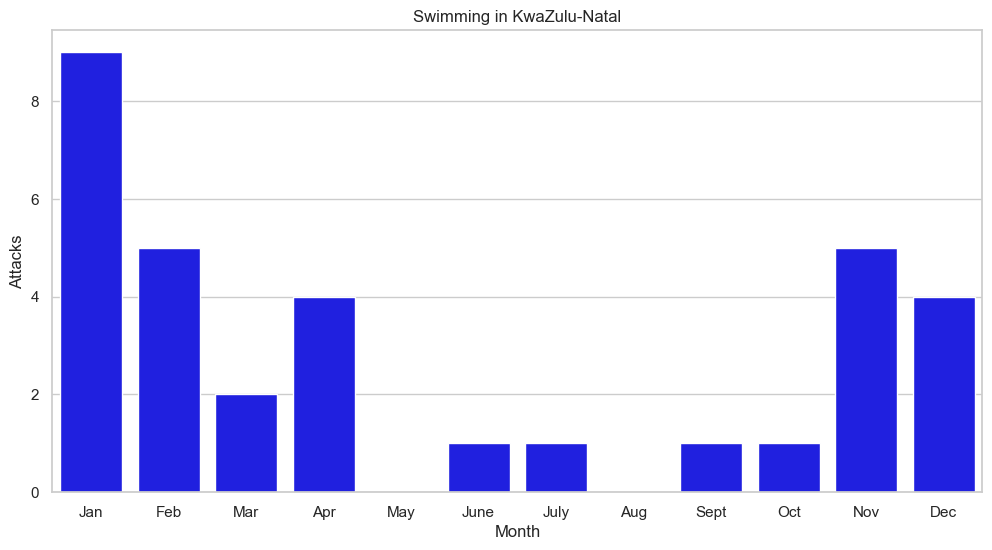

In [71]:
#KwaZulu-Natal PROVINCE DANGEROUS ACTIVITIES --> SWIMMING

swim_kw = kwazulu[kwazulu.Activity == "SWIMMING"]
swim_kw
sns.countplot(x=swim_kw.Month, order=month_order_1, color= "blue");
plt.xlabel('Month')
plt.ylabel('Attacks')
plt.title('Swimming in KwaZulu-Natal')

swim_kw.value_counts("Month")